In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Carregar os dados do arquivo CSV
df = pd.read_csv('dadosacoes.csv')
df = pd.read_csv('dadosacoes_limpos.csv')

# Limpar os nomes das colunas, removendo espaços extras e caracteres indesejados
df.columns = df.columns.str.strip()  # Remove espaços extras à esquerda e à direita

# Remover símbolos 'R$', e qualquer outro sufixo que não faça parte do nome da coluna
df.columns = df.columns.str.replace(r' R\$', '', regex=True)  # Remove o símbolo 'R$'
df.columns = df.columns.str.replace(r'\s*//.*', '', regex=True)  # Remove qualquer texto após '//' (como ' -(Bilhões)')
df.columns = df.columns.str.replace(r'\s*-\s*', '_', regex=True)  # Substitui o '-' por um '_'
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Substitui espaços em branco por '_'

# Verificar os nomes das colunas após a limpeza
print(df.columns)

# Garantir que as colunas numéricas estão no tipo correto
df['preco_acao'] = pd.to_numeric(df['preco_acao'], errors='coerce')
df['qtde_cotas'] = pd.to_numeric(df['qtde_cotas'], errors='coerce')
df['valor_de_mercado'] = pd.to_numeric(df['valor_de_mercado'], errors='coerce')  # Agora com o nome correto

# Verificar os tipos de dados das colunas
print(df.dtypes)

# Verificar valores ausentes
print(df.isnull().sum())

# Verificar duplicatas
print(df.duplicated().sum())

# Verificar os primeiros registros
print(df.head())

# Salvar o DataFrame limpo
df.to_csv('dadosacoes_limpos.csv', index=False)


Index(['nome_acao', 'preco_acao', 'qtde_cotas', 'valor_de_mercado'], dtype='object')
nome_acao           object
preco_acao           int64
qtde_cotas           int64
valor_de_mercado     int64
dtype: object
nome_acao           0
preco_acao          0
qtde_cotas          0
valor_de_mercado    0
dtype: int64
0
  nome_acao  preco_acao  qtde_cotas  valor_de_mercado
0     VALE3         194          45              2134
1     SUZB3          91          71              3069
2     SUZB3         165          41              2815
3     SUZB3          56          34              3613
4    GOOGLE         212           9              2975


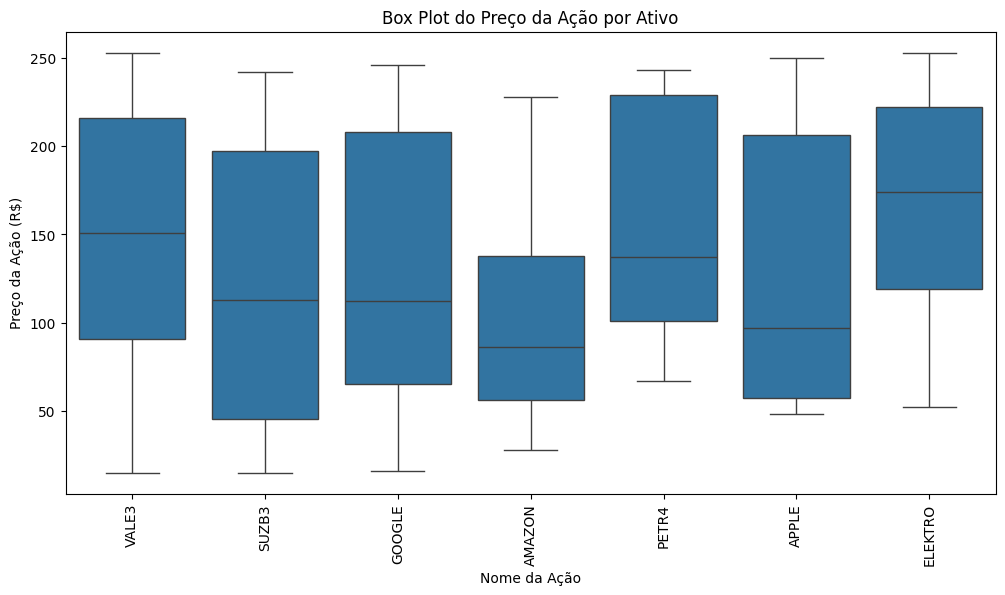

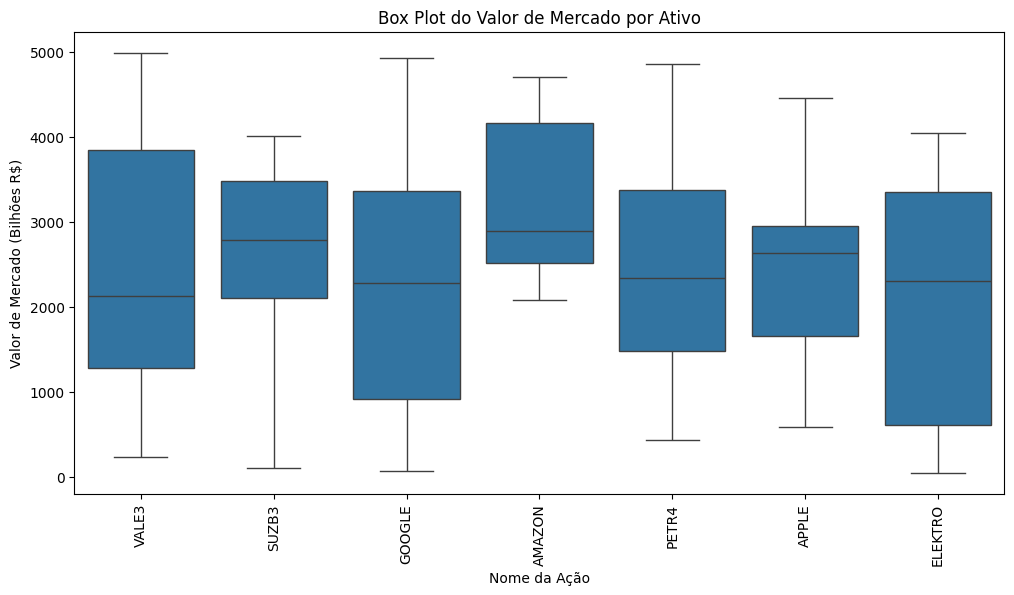

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nome_acao         100 non-null    object
 1   preco_acao        100 non-null    int64 
 2   qtde_cotas        100 non-null    int64 
 3   valor_de_mercado  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

Estatísticas descritivas do DataFrame:
       preco_acao  qtde_cotas  valor_de_mercado
count  100.000000  100.000000         100.00000
mean   136.140000   52.010000        2433.70000
std     75.237942   27.475791        1397.29373
min     15.000000    2.000000          52.00000
25%     67.000000   28.250000        1189.25000
50%    121.500000   55.500000        2433.00000
75%    209.000000   76.500000        3616.50000
max    253.000000   97.000000        4993.00000


In [3]:
# Carregar os dados (supondo que o DataFrame df já esteja limpo e com as colunas renomeadas corretamente)
# df = pd.read_csv('dadosacoes.csv')  # Descomente se precisar carregar o CSV

# a) Plotar box plot do preço da ação para cada ativo para verificar outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x='nome_acao', y='preco_acao', data=df)
plt.title('Box Plot do Preço da Ação por Ativo')
plt.xticks(rotation=90)  # Rotacionar os nomes das ações para melhor visualização
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação (R$)')
plt.show()

# b) Plotar box plot do valor de mercado da empresa para cada ativo para verificar outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x='nome_acao', y='valor_de_mercado', data=df)
plt.title('Box Plot do Valor de Mercado por Ativo')
plt.xticks(rotation=90)  # Rotacionar os nomes das ações para melhor visualização
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.show()

# c) Exibir informações do conjunto de dados (df.info()) e estatísticas descritivas (df.describe())

# Informações gerais sobre o DataFrame
print("Informações gerais do DataFrame:")
print(df.info())

# Estatísticas descritivas do DataFrame
print("\nEstatísticas descritivas do DataFrame:")
print(df.describe())

In [4]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [5]:
# Recarregar o CSV, caso df tenha sido sobrescrito
df = pd.read_csv('dadosacoes_limpos.csv')

# Verificar o tipo de df para garantir que é um DataFrame
print(f'Tipo de df: {type(df)}')

# Exibir as primeiras linhas do DataFrame
print("\nPrimeiras linhas do DataFrame:")
print(df.head())

# Lidar com valores ausentes
# Verificar se há valores ausentes no dataset
print("\nValores ausentes por coluna:")
print(df.isnull().sum())  # Isso deve funcionar se df for um DataFrame

# Preencher valores ausentes com a mediana (para as colunas numéricas)
df['preco_acao'] = df['preco_acao'].fillna(df['preco_acao'].median())
df['qtde_cotas'] = df['qtde_cotas'].fillna(df['qtde_cotas'].median())
df['valor_de_mercado'] = df['valor_de_mercado'].fillna(df['valor_de_mercado'].median())

# Codificar variáveis categóricas
# Transformar a coluna 'nome_acao' em variáveis dummy (binárias)
df = pd.get_dummies(df, columns=['nome_acao'], drop_first=True)

# Verificar o DataFrame após a codificação
print("\nDataFrame após a codificação das variáveis categóricas:")
print(df.head())

# Normalizar os dados
scaler = StandardScaler()
df_scaled = df.copy()  # Criar uma cópia para manter os dados originais

# Normalizar as colunas numéricas
df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']] = scaler.fit_transform(df[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Verificar o DataFrame normalizado
print("\nDataFrame normalizado:")
print(df_scaled.head())

Tipo de df: <class 'pandas.core.frame.DataFrame'>

Primeiras linhas do DataFrame:
  nome_acao  preco_acao  qtde_cotas  valor_de_mercado
0     VALE3         194          45              2134
1     SUZB3          91          71              3069
2     SUZB3         165          41              2815
3     SUZB3          56          34              3613
4    GOOGLE         212           9              2975

Valores ausentes por coluna:
nome_acao           0
preco_acao          0
qtde_cotas          0
valor_de_mercado    0
dtype: int64

DataFrame após a codificação das variáveis categóricas:
   preco_acao  qtde_cotas  valor_de_mercado  nome_acao_APPLE  \
0         194          45              2134            False   
1          91          71              3069            False   
2         165          41              2815            False   
3          56          34              3613            False   
4         212           9              2975            False   

   nome_acao_ELEKTRO 


--- Etapa a: K-means com n_clusters=4 ---

Primeiras linhas com o agrupamento de 4 clusters:
   preco_acao  qtde_cotas  valor_de_mercado  cluster_4
0    0.772901   -0.256419         -0.215567          3
1   -0.602986    0.694636          0.456955          1
2    0.385515   -0.402735          0.274259          0
3   -1.070520   -0.658788          0.848240          0
4    1.013347   -1.573264          0.389343          0

--- Etapa b: Alterar o número de clusters para 5 ---

Primeiras linhas com o agrupamento de 5 clusters:
   preco_acao  qtde_cotas  valor_de_mercado  cluster_5
0    0.772901   -0.256419         -0.215567          3
1   -0.602986    0.694636          0.456955          4
2    0.385515   -0.402735          0.274259          0
3   -1.070520   -0.658788          0.848240          0
4    1.013347   -1.573264          0.389343          0

--- Etapa c: Gráfico do Cotovelo ---


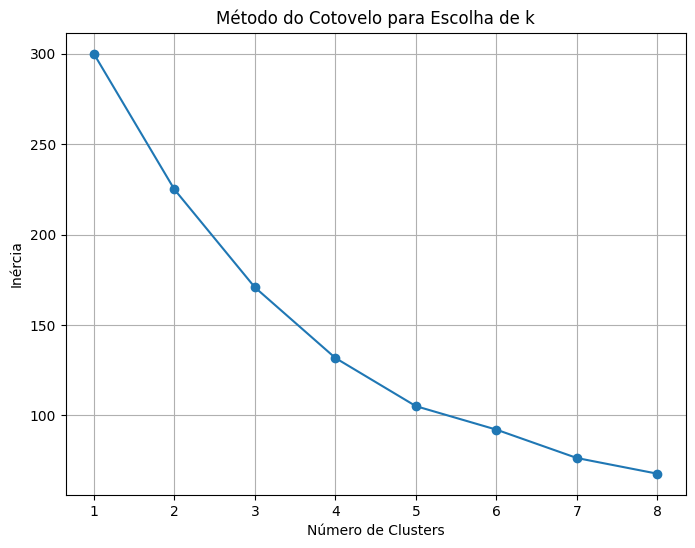


--- Etapa d: Gráfico da Silhueta ---

Gráfico da silhueta para 2 clusters:
Valor médio para 2 clusters: 0.237


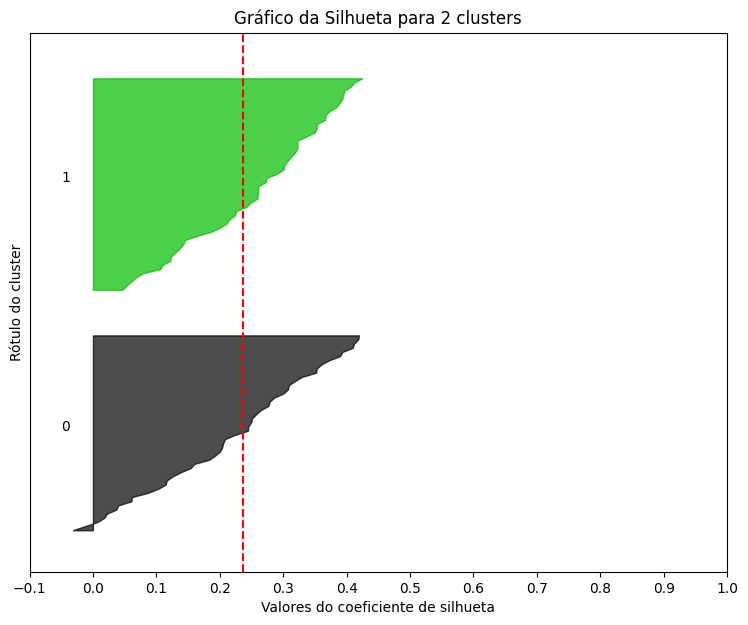


Gráfico da silhueta para 3 clusters:
Valor médio para 3 clusters: 0.262


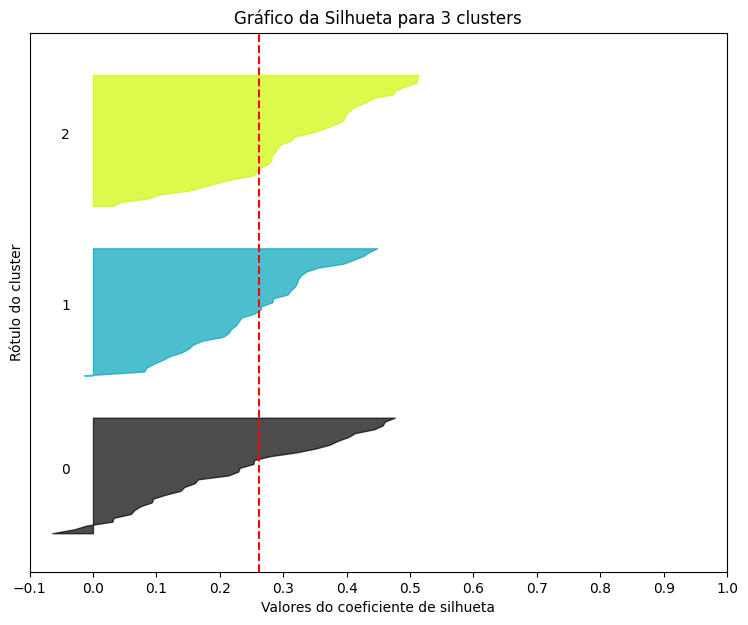


Gráfico da silhueta para 4 clusters:
Valor médio para 4 clusters: 0.273


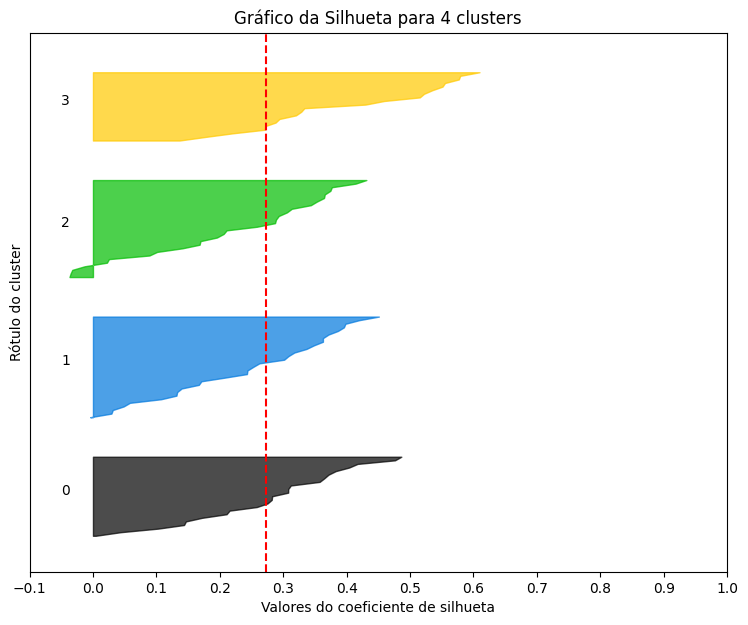


Gráfico da silhueta para 5 clusters:
Valor médio para 5 clusters: 0.298


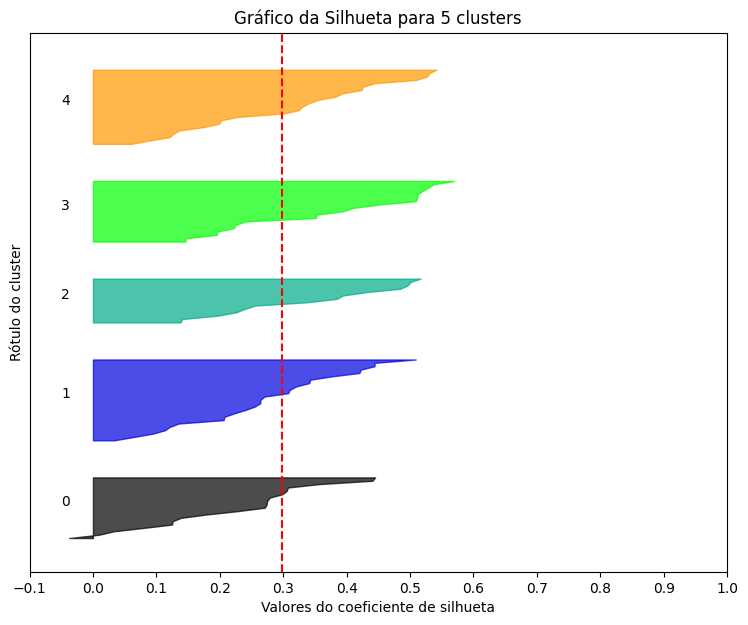


Gráfico da silhueta para 6 clusters:
Valor médio para 6 clusters: 0.286


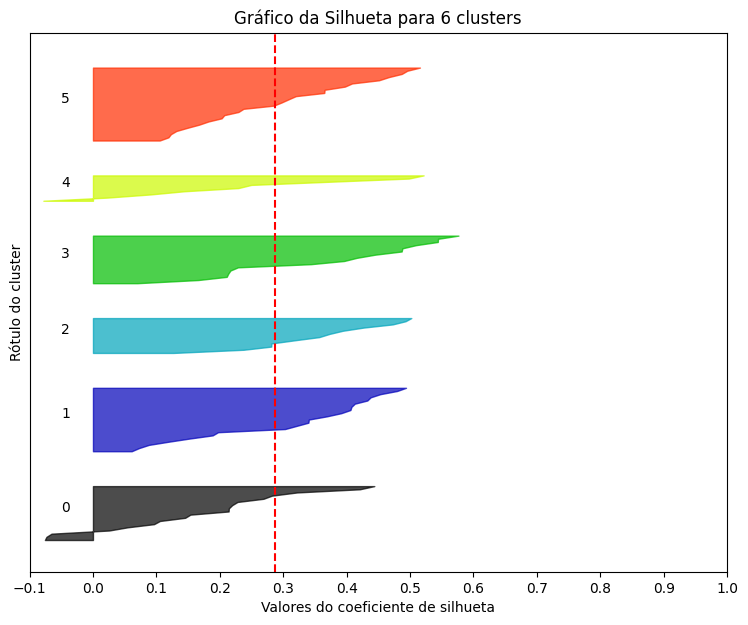


Gráfico da silhueta para 7 clusters:
Valor médio para 7 clusters: 0.301


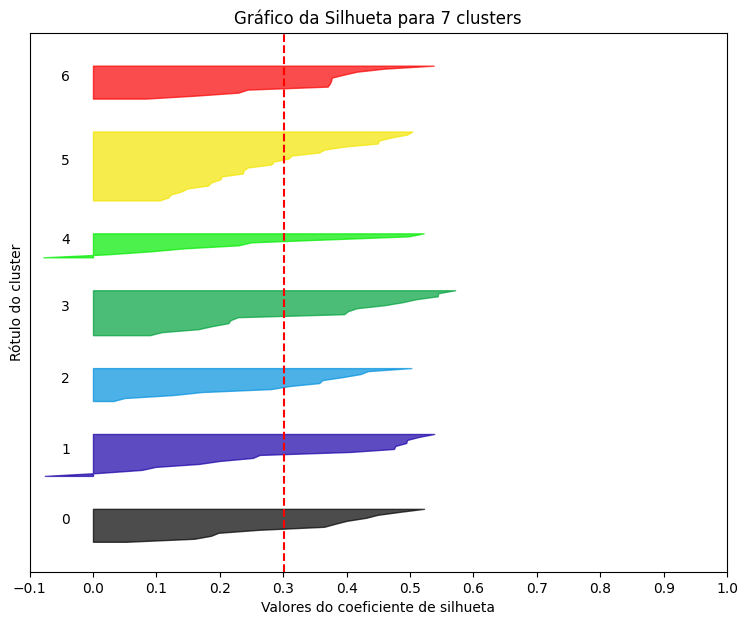


Gráfico da silhueta para 8 clusters:
Valor médio para 8 clusters: 0.296


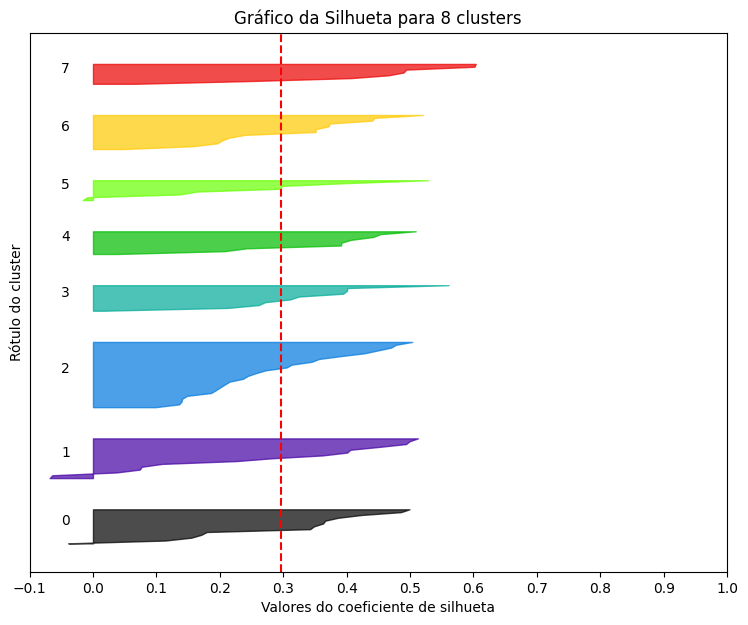

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd
import numpy as np

def graf_silhueta(n_clusters, dados_n):
    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
                          facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

# Carregar os dados (supondo que df já tenha sido limpo)
df = pd.read_csv('dadosacoes_limpos.csv')

# Normalizar os dados para o K-means (com base nas variáveis numéricas)
scaler = StandardScaler()
df_scaled = df.copy()  # Criar uma cópia para manter os dados originais

# Normalizar as colunas numéricas
df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']] = scaler.fit_transform(df[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# ---- Etapa a: Aplicar K-means com n_clusters=4 ----
print("\n--- Etapa a: K-means com n_clusters=4 ---")
# Aplicando K-means com n_clusters = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_scaled['cluster_4'] = kmeans_4.fit_predict(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Exibir os primeiros registros com os clusters atribuídos
print("\nPrimeiras linhas com o agrupamento de 4 clusters:")
print(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado', 'cluster_4']].head())

# ---- Etapa b: Alterar o número de clusters para 5 ----
print("\n--- Etapa b: Alterar o número de clusters para 5 ---")
# Aplicando K-means com n_clusters = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df_scaled['cluster_5'] = kmeans_5.fit_predict(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Exibir os primeiros registros com os clusters atribuídos
print("\nPrimeiras linhas com o agrupamento de 5 clusters:")
print(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado', 'cluster_5']].head())

# ---- Etapa c: Plotar o gráfico do cotovelo para n variando de 1 a 8 clusters ----
print("\n--- Etapa c: Gráfico do Cotovelo ---")
# Método do Cotovelo: calcular a inércia para diferentes números de clusters
inercia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inercia, marker='o')
plt.title('Método do Cotovelo para Escolha de k')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 9))
plt.grid(True)
plt.show()

# ---- Etapa d: Plotar o gráfico da silhueta para n variando de 2 a 8 clusters ----
print("\n--- Etapa d: Gráfico da Silhueta ---")
# Calcular e plotar a silhueta para diferentes números de clusters
for k in range(2, 9):  # Não faz sentido calcular para 1 cluster
    print(f"\nGráfico da silhueta para {k} clusters:")
    graf_silhueta(k, df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])


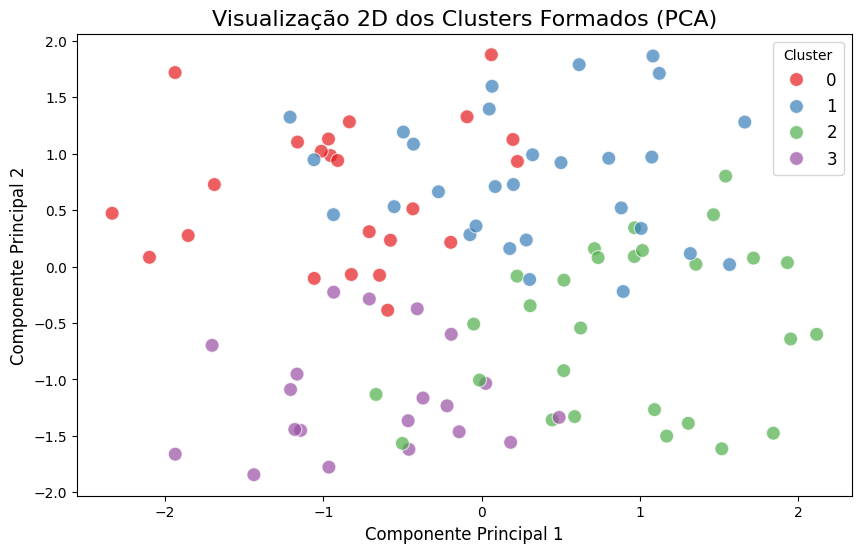

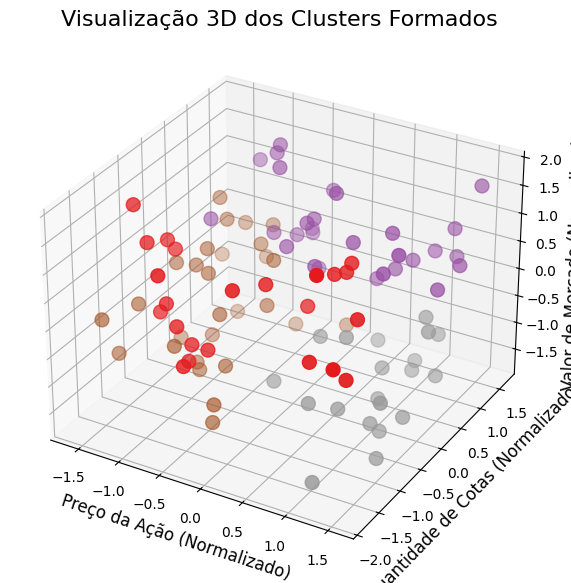

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Carregar os dados (supondo que df já tenha sido limpo)
df = pd.read_csv('dadosacoes_limpos.csv')

# Normalizar os dados para o K-means (com base nas variáveis numéricas)
scaler = StandardScaler()
df_scaled = df.copy()  # Criar uma cópia para manter os dados originais

# Normalizar as colunas numéricas
df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']] = scaler.fit_transform(df[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Aplicar o K-means com n_clusters=4 (Você pode alterar o número de clusters conforme necessário)
kmeans = KMeans(n_clusters=4, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# ---- a) Visualização 2D dos clusters formados ----
# Redução de dimensionalidade para 2D usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[['preco_acao', 'qtde_cotas', 'valor_de_mercado']])

# Criar o gráfico 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['cluster'], palette='Set1', s=100, alpha=0.7, edgecolor='w', marker='o')

# Títulos e labels
plt.title('Visualização 2D dos Clusters Formados (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster', loc='best', fontsize=12)
plt.show()

# ---- b) Visualização 3D dos clusters formados ----
# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos 3D com a cor representando o cluster
ax.scatter(df_scaled['preco_acao'], df_scaled['qtde_cotas'], df_scaled['valor_de_mercado'], c=df_scaled['cluster'], cmap='Set1', s=100)

# Títulos e labels
ax.set_title('Visualização 3D dos Clusters Formados', fontsize=16)
ax.set_xlabel('Preço da Ação (Normalizado)', fontsize=12)
ax.set_ylabel('Quantidade de Cotas (Normalizado)', fontsize=12)
ax.set_zlabel('Valor de Mercado (Normalizado)', fontsize=12)
plt.show()
